In [200]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
import networkx as nx

from sklearn import preprocessing
from sklearn import utils

# Disable annoying warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [201]:
df = pd.read_csv("nba_player_data.csv")
df = df.dropna()
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Arron Afflalo,SG,24,DEN,82,75,27.1,3.3,7.1,0.465,...,0.7,2.4,3.1,1.7,0.6,0.4,0.9,2.7,8.8,2010
2,LaMarcus Aldridge,PF,24,POR,78,78,37.5,7.4,15.0,0.495,...,2.5,5.6,8.0,2.1,0.9,0.6,1.3,3.0,17.9,2010
3,Joe Alexander,SF,23,CHI,8,0,3.6,0.1,0.8,0.167,...,0.3,0.4,0.6,0.3,0.1,0.1,0.0,1.1,0.5,2010
4,Malik Allen,PF,31,DEN,51,3,8.9,0.9,2.3,0.397,...,0.7,0.9,1.6,0.3,0.2,0.1,0.4,1.3,2.1,2010
5,Ray Allen*,SG,34,BOS,80,80,35.2,5.8,12.2,0.477,...,0.6,2.6,3.2,2.6,0.8,0.3,1.6,2.3,16.3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8296,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,0.578,...,1.5,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1,2022
8297,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
8298,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
8299,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022


Adding information

In [202]:
Efficiency = df.PTS + df.TRB + df.AST + df.STL + df.BLK - (df.FGA - df.FG) - (df.FTA - df.FT) - df.TOV
df.insert(29, "EFF", Efficiency)


Efficiency_per_36 = (df.PTS + df.TRB + df.AST + df.STL + df.BLK - (df.FGA - df.FG) - (df.FTA - df.FT) - df.TOV)/df.MP*36

df.insert(30, "EFF_36", Efficiency_per_36.round(1))

df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,EFF_36,Year
0,Arron Afflalo,SG,24,DEN,82,75,27.1,3.3,7.1,0.465,...,3.1,1.7,0.6,0.4,0.9,2.7,8.8,9.6,12.8,2010
2,LaMarcus Aldridge,PF,24,POR,78,78,37.5,7.4,15.0,0.495,...,8.0,2.1,0.9,0.6,1.3,3.0,17.9,19.6,18.8,2010
3,Joe Alexander,SF,23,CHI,8,0,3.6,0.1,0.8,0.167,...,0.6,0.3,0.1,0.1,0.0,1.1,0.5,0.8,8.0,2010
4,Malik Allen,PF,31,DEN,51,3,8.9,0.9,2.3,0.397,...,1.6,0.3,0.2,0.1,0.4,1.3,2.1,2.4,9.7,2010
5,Ray Allen*,SG,34,BOS,80,80,35.2,5.8,12.2,0.477,...,3.2,2.6,0.8,0.3,1.6,2.3,16.3,14.9,15.2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8296,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,0.578,...,3.6,2.3,0.9,0.3,1.2,1.5,6.1,9.5,24.1,2022
8297,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,...,4.4,1.7,1.2,0.4,0.8,1.7,6.3,9.8,19.3,2022
8298,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,3.7,9.7,0.9,0.1,4.0,1.7,28.4,27.2,28.1,2022
8299,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,...,5.3,0.9,0.3,0.4,0.7,1.5,5.3,9.0,25.7,2022


Data Splitting

In [203]:
players_C = df[df.Pos == "C"]
players_PG = df[df.Pos == "PG"]
players_SG = df[df.Pos == "SG"]
players_SF = df[df.Pos == "SF"]
players_PF = df[df.Pos == "PF"]

players_PG.tail(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,EFF_36,Year
8251,Brad Wanamaker,PG,32,TOT,23,2,13.9,1.2,3.3,0.364,...,1.7,2.4,0.3,0.3,1.0,2.0,3.6,5.1,13.2,2022
8252,Brad Wanamaker,PG,32,IND,22,1,13.3,1.2,3.3,0.361,...,1.6,2.2,0.2,0.3,1.0,1.9,3.5,4.6,12.5,2022
8254,Duane Washington Jr.,PG,21,IND,48,7,20.2,3.6,8.9,0.405,...,1.7,1.8,0.5,0.1,1.2,1.4,9.9,7.2,12.8,2022
8264,Russell Westbrook,PG,33,LAL,78,78,34.3,7.0,15.8,0.444,...,7.4,7.1,1.0,0.3,3.8,3.0,18.5,20.0,21.0,2022
8265,Coby White,PG,21,CHI,61,17,27.5,4.6,10.6,0.433,...,3.0,2.9,0.5,0.2,1.1,2.2,12.7,12.0,15.7,2022
8273,Lindell Wigginton,PG,23,MIL,19,0,10.5,1.4,3.2,0.426,...,1.3,1.2,0.3,0.1,0.6,0.9,4.2,3.9,13.4,2022
8274,Brandon Williams,PG,22,POR,24,16,26.7,4.4,11.8,0.372,...,3.1,3.9,1.0,0.4,2.4,2.2,12.9,10.3,13.9,2022
8277,Lou Williams,PG,35,ATL,56,0,14.3,2.2,5.7,0.391,...,1.6,1.9,0.5,0.1,0.8,0.9,6.3,5.9,14.9,2022
8286,Cassius Winston,PG,23,WAS,7,0,5.6,0.6,1.6,0.364,...,0.1,1.0,0.0,0.0,0.4,1.3,2.0,1.7,10.9,2022
8298,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,3.7,9.7,0.9,0.1,4.0,1.7,28.4,27.2,28.1,2022


Exploratory data

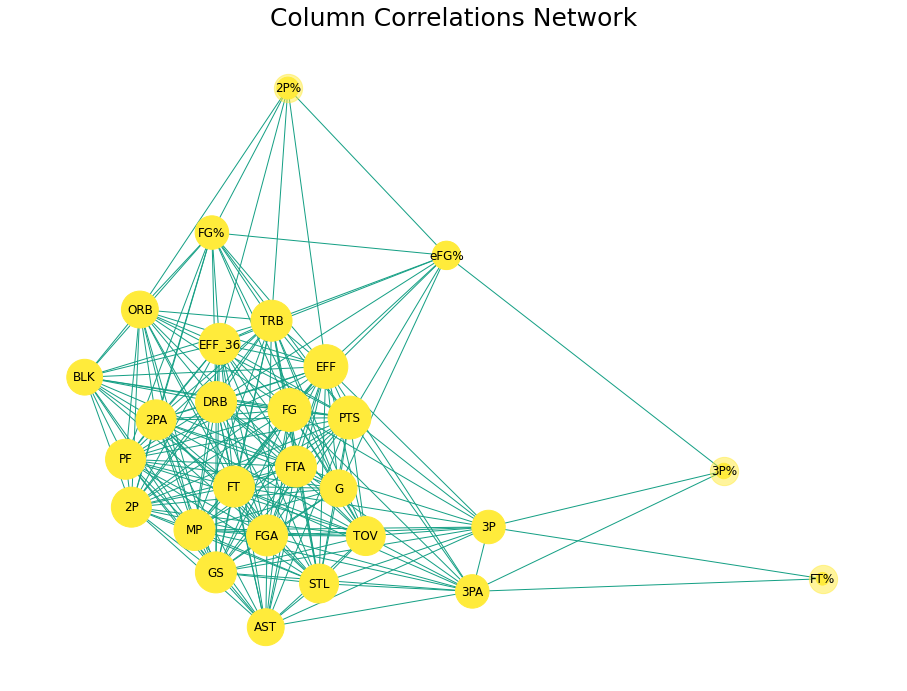

In [204]:
# Column Correlations Network
main_color = "#16a085"
strong_main_color = "#ffeb3b"
custom_colors = [strong_main_color, main_color]

thresh = 0.3
def correlation_network(data, corr_interval=[-0.9, 0.9], data_type="Train", node_color=custom_colors[1]):
    data = data
    corr = data.corr()
    corr = pd.melt(corr.reset_index(), id_vars="index")
    corr.columns = ["x", "y", "value"]
    high_corr = corr[((corr["value"] <= corr_interval[0]) | (corr["value"] >= corr_interval[1]))]
    high_corr = high_corr[(high_corr["value"] != 1)].reset_index(drop=True)
    sources = list(high_corr.x.unique())
    targets = list(high_corr.y.unique())
    plt.figure(figsize=(16, 12))
    g = nx.from_pandas_edgelist(high_corr, source="x", target="y") 
    layout = nx.spring_layout(g, iterations=50, k=0.6, seed=1337)
    target_size = [g.degree(t) * 80 for t in targets]
    nx.draw_networkx_nodes(g, layout, nodelist=targets, node_size=target_size, node_color=node_color)
    nx.draw_networkx_nodes(g, layout, nodelist=sources, node_color=node_color, node_size=800, alpha=0.5)
    nx.draw_networkx_edges(g, layout, width=1, edge_color=custom_colors[1])
    target_dict = dict(zip(targets, targets))
    nx.draw_networkx_labels(g, layout, labels=target_dict)
    plt.axis("off")
    plt.title(f"Column Correlations Network", fontsize=25)
    plt.show()
correlation_network(data=df, corr_interval=[-thresh, thresh], data_type="Train", node_color=custom_colors[0])

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

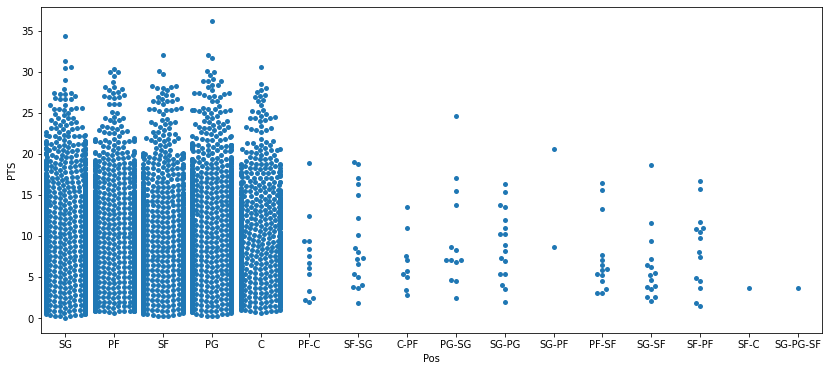

In [205]:
# points-position relation
plt.figure(figsize=(14,6))
sns.swarmplot(x=df["Pos"],
              y=df["PTS"])

In [206]:
# points mean per position
print("Points mean C: " + str(round(players_C.PTS.mean())))
print("Points mean PG: " + str(round(players_PG.PTS.mean())))
print("Points mean SG: " + str(round(players_SG.PTS.mean())))
print("Points mean PF: " + str(round(players_PF.PTS.mean())))
print("Points mean SF: " + str(round(players_SF.PTS.mean())))

Points mean C: 9
Points mean PG: 9
Points mean SG: 9
Points mean PF: 9
Points mean SF: 8


In [221]:
# points mean per position last season
print("Points mean C: " + str(round(players_C[players_C["Year"] == 2022].PTS.mean())))
print("Points mean PG: " + str(round(players_PG[players_PG["Year"] == 2022].PTS.mean())))
print("Points mean SG: " + str(round(players_SG[players_SG["Year"] == 2022].PTS.mean())))
print("Points mean PF: " + str(round(players_PF[players_PF["Year"] == 2022].PTS.mean())))
print("Points mean SF: " + str(round(players_SF[players_SF["Year"] == 2022].PTS.mean())))

Points mean C: 9
Points mean PG: 10
Points mean SG: 10
Points mean PF: 9
Points mean SF: 8


<AxesSubplot:xlabel='Pos', ylabel='EFF'>

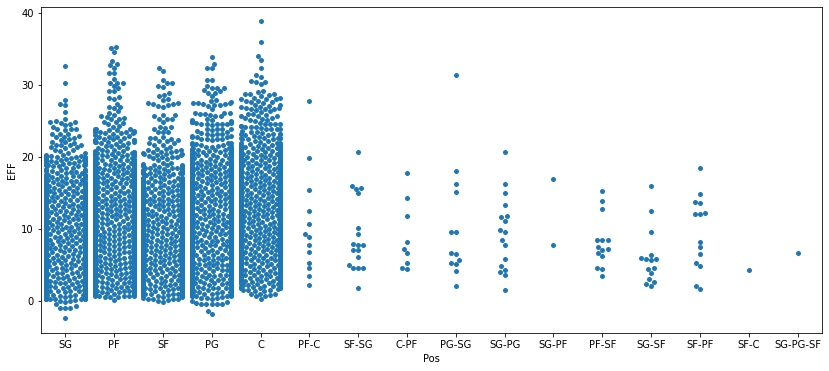

In [207]:
# efficiency-position relation
plt.figure(figsize=(14,6))
sns.swarmplot(x=df["Pos"],
              y=df["EFF"])

<AxesSubplot:xlabel='Pos', ylabel='EFF'>

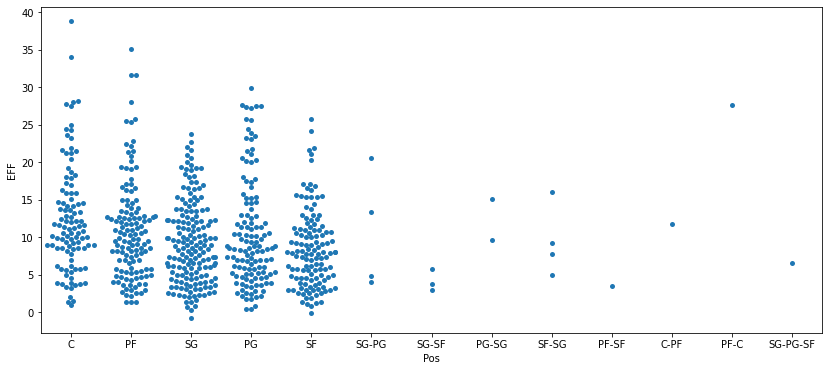

In [208]:
# efficiency-position relation last season
plt.figure(figsize=(14,6))
sns.swarmplot(x=df[df["Year"] == 2022]["Pos"],
              y=df[df["Year"] == 2022]["EFF"])

<AxesSubplot:xlabel='Pos', ylabel='EFF_36'>

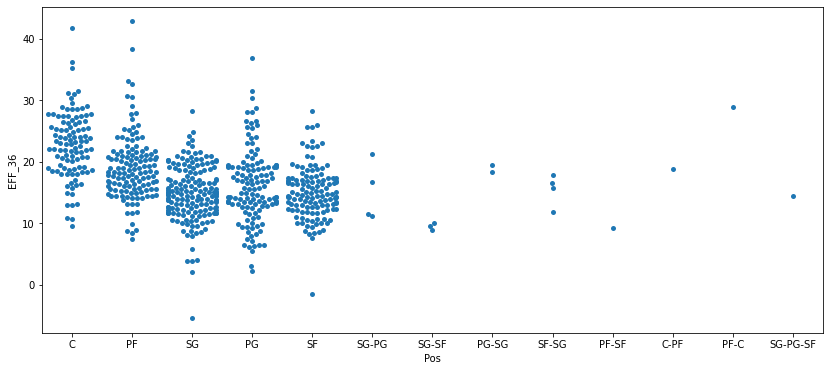

In [222]:
# efficiency-position per 36 relation last season
plt.figure(figsize=(14,6))
sns.swarmplot(x=df[df["Year"] == 2022]["Pos"],
              y=df[df["Year"] == 2022]["EFF_36"])

In [209]:
# efficiency mean per position
print("Efficiency mean C: " + str(round(players_C.EFF.mean())))
print("Efficiency mean PG: " + str(round(players_PG.EFF.mean())))
print("Efficiency mean SG: " + str(round(players_SG.EFF.mean())))
print("Efficiency mean PF: " + str(round(players_PF.EFF.mean())))
print("Efficiency mean SF: " + str(round(players_SF.EFF.mean())))

Efficiency mean C: 12
Efficiency mean PG: 10
Efficiency mean SG: 8
Efficiency mean PF: 10
Efficiency mean SF: 9


In [210]:
# efficiency mean per position last season
print("Efficiency mean C: " + str(round(players_C[players_C["Year"] == 2022].EFF.mean())))
print("Efficiency mean PG: " + str(round(players_PG[players_PG["Year"] == 2022].EFF.mean())))
print("Efficiency mean SG: " + str(round(players_SG[players_SG["Year"] == 2022].EFF.mean())))
print("Efficiency mean PF: " + str(round(players_PF[players_PF["Year"] == 2022].EFF.mean())))
print("Efficiency mean SF: " + str(round(players_SF[players_SF["Year"] == 2022].EFF.mean())))

Efficiency mean C: 13
Efficiency mean PG: 11
Efficiency mean SG: 9
Efficiency mean PF: 11
Efficiency mean SF: 8


<AxesSubplot:xlabel='Age', ylabel='PTS'>

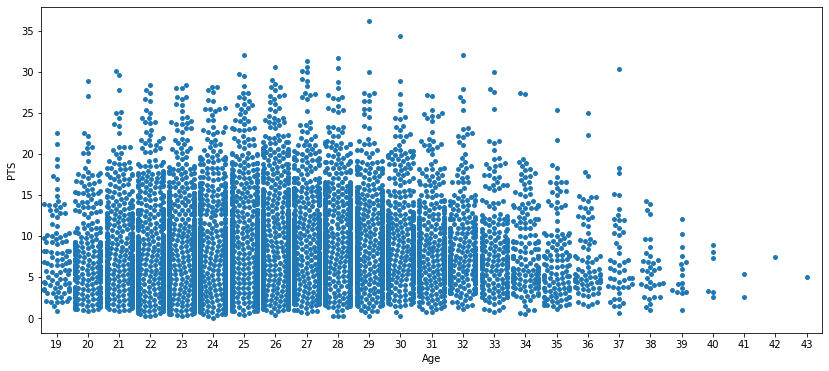

In [211]:
# points-age relation
plt.figure(figsize=(14,6))
sns.swarmplot(x=df["Age"],
              y=df["PTS"])

<AxesSubplot:xlabel='Age', ylabel='PTS'>

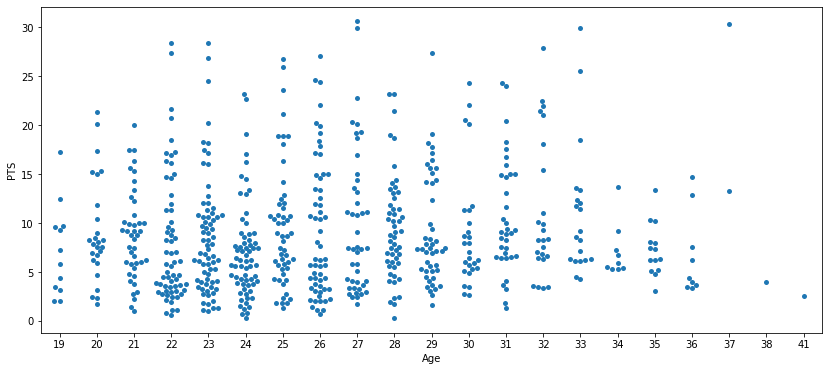

In [212]:
# points-age relation last season
plt.figure(figsize=(14,6))
sns.swarmplot(x=df[df["Year"] == 2022]["Age"],
              y=df[df["Year"] == 2022]["PTS"])


<AxesSubplot:xlabel='Year', ylabel='PTS'>

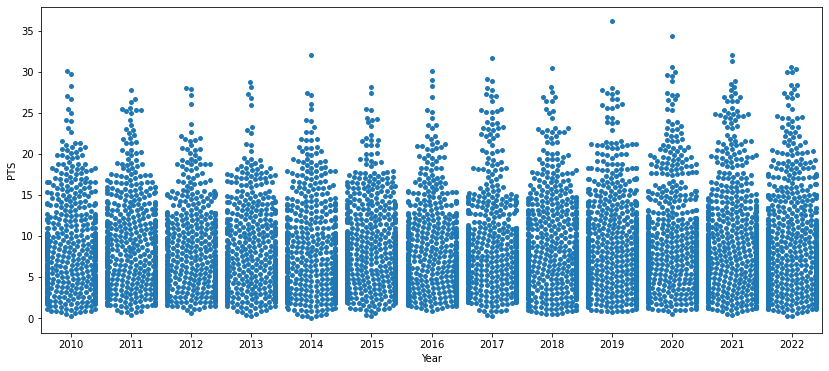

In [213]:
# points-year relation
plt.figure(figsize=(14,6))
sns.swarmplot(x=df["Year"],
              y=df["PTS"])

In [214]:
print("mean PTS for 2022: " + str(df[df["Year"] == 2022].PTS.mean()))
print("mean PTS for 2021: " + str(df[df["Year"] == 2021].PTS.mean()))
print("mean PTS for 2020: " + str(df[df["Year"] == 2020].PTS.mean()))
print("mean PTS for 2019: " + str(df[df["Year"] == 2019].PTS.mean()))
print("mean PTS for 2018: " + str(df[df["Year"] == 2018].PTS.mean()))
print("mean PTS for 2017: " + str(df[df["Year"] == 2017].PTS.mean()))
print("mean PTS for 2016: " + str(df[df["Year"] == 2016].PTS.mean()))
print("mean PTS for 2015: " + str(df[df["Year"] == 2015].PTS.mean()))
print("mean PTS for 2014: " + str(df[df["Year"] == 2014].PTS.mean()))
print("mean PTS for 2013: " + str(df[df["Year"] == 2013].PTS.mean()))
print("mean PTS for 2012: " + str(df[df["Year"] == 2012].PTS.mean()))
print("mean PTS for 2011: " + str(df[df["Year"] == 2011].PTS.mean()))
print("mean PTS for 2010: " + str(df[df["Year"] == 2010].PTS.mean()))

mean PTS for 2022: 8.993303571428571
mean PTS for 2021: 9.124729520865532
mean PTS for 2020: 9.00642978003384
mean PTS for 2019: 8.98139904610493
mean PTS for 2018: 8.813903743315509
mean PTS for 2017: 8.743126177024482
mean PTS for 2016: 8.517623762376237
mean PTS for 2015: 8.517391304347827
mean PTS for 2014: 8.506024096385541
mean PTS for 2013: 8.366808510638299
mean PTS for 2012: 8.652262443438914
mean PTS for 2011: 8.92394366197183
mean PTS for 2010: 9.038025210084033


Future stars (Players under 23)

In [215]:
Cs = pd.DataFrame(players_C[players_C["Year"] == 2022].Player[(players_C[players_C["Year"] == 2022].Age<=23)&(players_C[players_C["Year"] == 2022].PTS>=10)&(players_C[players_C["Year"] == 2022].EFF>=12)]).rename(columns={"Player": "Centers"}).reset_index(drop=True)
PGs = pd.DataFrame(players_PG[players_PG["Year"] == 2022].Player[(players_PG[players_PG["Year"] == 2022].Age<=23)&(players_PG[players_PG["Year"] == 2022].PTS>=10)&(players_PG[players_PG["Year"] == 2022].EFF>=12)]).rename(columns={"Player": "Point Guards"}).reset_index(drop=True)
SGs = pd.DataFrame(players_SG[players_SG["Year"] == 2022].Player[(players_SG[players_SG["Year"] == 2022].Age<=23)&(players_SG[players_SG["Year"] == 2022].PTS>=10)&(players_SG[players_SG["Year"] == 2022].EFF>=12)]).rename(columns={"Player": "Shooting Guards"}).reset_index(drop=True)
PFs = pd.DataFrame(players_PF[players_PF["Year"] == 2022].Player[(players_PF[players_PF["Year"] == 2022].Age<=23)&(players_PF[players_PF["Year"] == 2022].PTS>=10)&(players_PF[players_PF["Year"] == 2022].EFF>=12)]).rename(columns={"Player": "Power Forwards"}).reset_index(drop=True)
SFs = pd.DataFrame(players_SF[players_SF["Year"] == 2022].Player[(players_SF[players_SF["Year"] == 2022].Age<=23)&(players_SF[players_SF["Year"] == 2022].PTS>=10)&(players_SF[players_SF["Year"] == 2022].EFF>=12)]).rename(columns={"Player": "Small Forwards"}).reset_index(drop=True)

future = pd.concat([Cs, PGs, SGs, PFs, SFs], axis=1, join="outer")
future

,Centers,Point Guards,Shooting Guards,Power Forwards,Small Forwards
0,Jarrett Allen,Cole Anthony,Desmond Bane,Marvin Bagley III,RJ Barrett
1,Deandre Ayton,LaMelo Ball,Cade Cunningham,Marvin Bagley III,Saddiq Bey
2,Mo Bamba,Luka Dončić,Hamidou Diallo,Scottie Barnes,Josh Giddey
3,P.J. Washington,Markelle Fultz,Luguentz Dort,Darius Bazley,Jaylen Hoard
4,NaN,Darius Garland,Anthony Edwards,Miles Bridges,Kevin Huerter
5,NaN,Shai Gilgeous-Alexander,Jalen Green,Wendell Carter Jr.,Keldon Johnson
6,NaN,Tyrese Haliburton,Tyrese Haliburton,Jaren Jackson Jr.,Georgios Kalaitzakis
7,NaN,Tyrese Maxey,Tyler Herro,Evan Mobley,Jayson Tatum
8,NaN,Ja Morant,De'Anthony Melton,Isaiah Roby,Devin Vassell
9,NaN,Kevin Porter Jr.,Malik Monk,Jalen Smith,Franz Wagner


Team stats

In [228]:
df[df["Year"] == 2022]["Tm"].unique()

array(['TOR', 'MEM', 'MIA', 'BRK', 'TOT', 'NOP', 'UTA', 'MIL', 'CLE',
       'IND', 'LAL', 'ORL', 'HOU', 'WAS', 'PHO', 'SAC', 'DET', 'CHO',
       'CHI', 'NYK', 'DEN', 'PHI', 'SAS', 'LAC', 'OKC', 'MIN', 'DAL',
       'GSW', 'POR', 'ATL', 'BOS'], dtype=object)

In [254]:
teams_2022 = ['TOR', 'MEM', 'MIA', 'BRK', 'NOP', 'UTA', 'MIL', 'CLE',
       'IND', 'LAL', 'ORL', 'HOU', 'WAS', 'PHO', 'SAC', 'DET', 'CHO',
       'CHI', 'NYK', 'DEN', 'PHI', 'SAS', 'LAC', 'OKC', 'MIN', 'DAL',
       'GSW', 'POR', 'ATL', 'BOS']

df_mean = pd.DataFrame()

for team in teams_2022:
    year_players = df[df["Year"] == 2022]
    players_team = year_players[year_players["Tm"] == team]
    mean = players_team.mean()


    mean.name = team

    df_mean = df_mean.append(mean)


df_mean = df_mean.drop("G", axis=1)
df_mean = df_mean.drop("GS", axis=1)
df_mean = df_mean.drop("MP", axis=1)
df_mean


,Age,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,EFF_36,Year
TOR,25.105263,3.173684,7.126316,0.436632,0.931579,2.731579,0.275053,2.257895,4.405263,0.504737,...,3.684211,1.757895,0.805263,0.389474,0.857895,1.647368,8.615789,10.015789,17.289474,2022.0
MEM,23.705882,3.517647,7.752941,0.439824,0.941176,2.788235,0.293588,2.588235,4.976471,0.532000,...,3.776471,2.029412,0.752941,0.494118,0.988235,1.629412,9.329412,10.641176,17.982353,2022.0
MIA,27.900000,3.205000,6.955000,0.443250,1.145000,2.925000,0.337450,2.065000,4.030000,0.469200,...,3.500000,2.025000,0.565000,0.285000,1.070000,1.645000,8.960000,10.145000,16.985000,2022.0
BRK,28.947368,4.068421,8.652632,0.460526,1.210526,3.257895,0.319737,2.852632,5.405263,0.506105,...,4.321053,2.521053,0.700000,0.473684,1.342105,2.031579,10.968421,12.668421,18.884211,2022.0
NOP,25.950000,3.505000,7.620000,0.446850,0.945000,2.815000,0.330900,2.530000,4.810000,0.505500,...,3.680000,2.210000,0.725000,0.320000,1.120000,1.675000,9.400000,10.685000,18.175000,2022.0
UTA,27.437500,3.193750,6.975000,0.440625,1.306250,3.631250,0.316250,1.875000,3.356250,0.583313,...,3.481250,1.900000,0.606250,0.331250,1.062500,1.481250,9.050000,10.100000,16.462500,2022.0
MIL,27.478261,3.078261,6.700000,0.444130,1.104348,2.991304,0.372174,1.978261,3.713043,0.496913,...,3.595652,1.782609,0.630435,0.334783,0.956522,1.573913,8.552174,9.921739,16.526087,2022.0
CLE,25.700000,3.385000,7.400000,0.440450,0.920000,2.770000,0.266400,2.470000,4.615000,0.540050,...,3.440000,2.405000,0.610000,0.290000,1.225000,1.460000,9.250000,10.295000,16.950000,2022.0
IND,26.217391,3.952174,8.569565,0.451609,1.156522,3.456522,0.319870,2.795652,5.121739,0.554348,...,4.052174,2.656522,0.713043,0.552174,1.295652,1.982609,10.621739,12.217391,18.252174,2022.0
LAL,29.400000,3.525000,7.700000,0.447150,1.055000,3.155000,0.335900,2.475000,4.550000,0.528500,...,3.830000,2.000000,0.735000,0.530000,1.260000,2.065000,9.700000,10.810000,17.545000,2022.0


In [216]:
y = df["PTS"]
X = df.drop("PTS", axis=1)
X = X.drop("Player", axis=1)
#X = X.drop("Year", axis=1)
#X = X.drop("Pos", axis=1)
#X = X.drop("Tm", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.3, random_state = 0)

lab_enc = preprocessing.LabelEncoder()
encoded_y_train = lab_enc.fit_transform(y_train)
encoded_y_train

array([116,  91, 189, ...,   8, 170,  48], dtype=int64)

In [217]:
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(encoded_y_train))

continuous
multiclass
multiclass


In [218]:
ordinal_order = [["PG", "SG", "SF", "PF", "C",'SG-PF', 'SF-SG', 'PG-SG', 'PF-SF', 'SF-PF', 'SG-PG', 'PF-C', 'SF-C', 'C-PF', 'SG-SF', 'SG-PG-SF'], 
["DEN", "GSW", "NYK", 'CHI', 'BRK', 'BOS', 'NJN', 'MEM', 'LAL', 'ORL', 'DAL', 'POR', 'TOT', 'DET', 'TOR', 'CHA', 'NOH', 'SAC', 'LAC', 'UTA', 'HOU', 
'WAS', 'CHO', 'OKC', 'SAS', 'ATL', 'PHI', 'PHO', 'NOP', 'IND', 'MIL', 'MIA', 'CLE', 'MIN']]

In [219]:
from sklearn.compose import make_column_transformer
transformer = make_column_transformer((preprocessing.OrdinalEncoder(categories=ordinal_order), ["Pos", "Tm"]), remainder = "passthrough").fit(X_train)

In [220]:
encoded_x_train = transformer.transform(X_train)
encoded_x_test = transformer.transform(X_test)

In [199]:
clf1 = DecisionTreeClassifier(max_depth=None, min_samples_split=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, encoded_x_train, encoded_y_train, scoring="accuracy", cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.08 (+/- 0.00) [Logistic Regression]
Accuracy: 0.10 (+/- 0.01) [Random Forest]
Accuracy: 0.07 (+/- 0.00) [naive Bayes]
Accuracy: 0.07 (+/- 0.01) [Ensemble]
